#### 1.) Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
%matplotlib inline

In [31]:
path = r'C:\Users\dmlos\Achievement VI- Olist Business Analysis'

In [32]:
df = pd.read_csv(os.path.join(path, 'Olist-Original Data (Kaggle)', 'df_geolocation_customers_sellers_items_orders_clean_29.csv'))

In [33]:
df

,Unnamed: 0,Seller_Zip,Seller_Lat,Seller_Long,Customer_Zip,Customer_Lat,Customer_Long,Customer_ID,Customer_Unique_ID,Customer_City,...,Freight_Value,Payment_Type,review_id,Review_Score,Order_Status,Delivery-Purchase_Time_Difference_Min,Estimated-Purchase_Time_Difference_Min,Approval-Purchase_Time_Difference_Min,Carrier_Delivered-Order_Time_Difference_Min,Fulfillment Time
0,0,1041,-23.544392,-46.639499,7082,-23.434352,-46.542897,f3a2d5b49cc090c679649818bc3f8e8e,43926f36ab519f97f4c9ce01c6183c9c,guarulhos,...,9.57,credit_card,fa0564acf6469e703a848bccd7be6de9,5,delivered,2707.266667,33208.433333,27.683333,723.433333,Fast
1,1,1041,-23.544392,-46.639499,4718,-15.820763,-47.901087,b84999d47cecf126835a23650ee4ecb8,04efac4a29eec2c5662b65e87291ec38,brasilia,...,19.15,credit_card,3322460564fc8f370b077b7e49d733ad,4,delivered,14353.433333,23275.033333,1128.650000,2314.033333,Average
2,2,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,sao paulo,...,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333,Fast
3,3,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,sao paulo,...,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333,Fast
4,4,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,sao paulo,...,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333,Fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116745,116745,99730,-27.729373,-52.537491,28740,-22.082361,-41.865673,050309b91cc5e04e68841938e7984aaf,a1c2e4b4c1b29e41684ebdf3cc6538f8,conceicao de macabu,...,51.20,credit_card,d8b7a27e0ca2736c310d24a87bcba62a,5,delivered,14380.666667,34795.916667,19.833333,5158.916667,Average
116746,116746,99730,-27.729373,-52.537491,30315,-19.954557,-43.934100,58f2a48696b2cf8da50fcb21f8512c14,706c6cfe5101366f274a332a11671fa2,belo horizonte,...,33.48,boleto,28c48ed624ccf5855344639da4ffb854,2,delivered,10503.366667,41176.750000,7711.216667,6349.683333,Average
116747,116747,99730,-27.729373,-52.537491,12532,-15.616299,-56.047403,35e44b2134df14f2551b361aecdc47ce,f442c71d123cbc47ef86cc8fdd240ec8,cuiaba,...,51.47,credit_card,09c1b39e3df37b6d2cce3cf3f6cc83a0,5,delivered,21248.666667,39026.666667,21.066667,2316.666667,Average
116748,116748,99730,-27.729373,-52.537491,17304,-25.404673,-49.199713,3caac0647292a8ce09b6ab64320754d1,23b9a655ff10edb2d784aea93e460ae2,curitiba,...,18.33,boleto,e6e1ba6effd888b75ed2cf54555951d3,5,delivered,13127.716667,36808.866667,4846.733333,4703.716667,Average


## 2.) Clean the Data

In [34]:
df.columns

Index(['Unnamed: 0', 'Seller_Zip', 'Seller_Lat', 'Seller_Long', 'Customer_Zip',
       'Customer_Lat', 'Customer_Long', 'Customer_ID', 'Customer_Unique_ID',
       'Customer_City', 'Customer_State', 'Seller_ID', 'Seller_City',
       'Seller_State', 'Product_ID', 'Product_Category', 'Product_Weight(g)',
       'order_id', 'Price', 'Freight_Value', 'Payment_Type', 'review_id',
       'Review_Score', 'Order_Status', 'Delivery-Purchase_Time_Difference_Min',
       'Estimated-Purchase_Time_Difference_Min',
       'Approval-Purchase_Time_Difference_Min',
       'Carrier_Delivered-Order_Time_Difference_Min', 'Fulfillment Time'],
      dtype='object')

In [35]:
df.head(20)

,Unnamed: 0,Seller_Zip,Seller_Lat,Seller_Long,Customer_Zip,Customer_Lat,Customer_Long,Customer_ID,Customer_Unique_ID,Customer_City,...,Freight_Value,Payment_Type,review_id,Review_Score,Order_Status,Delivery-Purchase_Time_Difference_Min,Estimated-Purchase_Time_Difference_Min,Approval-Purchase_Time_Difference_Min,Carrier_Delivered-Order_Time_Difference_Min,Fulfillment Time
0,0,1041,-23.544392,-46.639499,7082,-23.434352,-46.542897,f3a2d5b49cc090c679649818bc3f8e8e,43926f36ab519f97f4c9ce01c6183c9c,guarulhos,...,9.57,credit_card,fa0564acf6469e703a848bccd7be6de9,5,delivered,2707.266667,33208.433333,27.683333,723.433333,Fast
1,1,1041,-23.544392,-46.639499,4718,-15.820763,-47.901087,b84999d47cecf126835a23650ee4ecb8,04efac4a29eec2c5662b65e87291ec38,brasilia,...,19.15,credit_card,3322460564fc8f370b077b7e49d733ad,4,delivered,14353.433333,23275.033333,1128.650000,2314.033333,Average
2,2,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,sao paulo,...,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333,Fast
3,3,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,sao paulo,...,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333,Fast
4,4,1035,-23.541578,-46.641607,1525,-23.567009,-46.637529,3fc1728dbe8a2b9375d4b530b8932550,8910eb29996c4c8905499106240ad3f9,sao paulo,...,7.39,credit_card,1756f3a6e91c1cb546124d076b62fb14,5,delivered,2979.450000,20720.633333,18.083333,1129.633333,Fast
5,5,1035,-23.541578,-46.641607,2565,-23.486109,-46.668268,f3e39e72d0f4d6e158f2ead42a5d4f43,9f0d87c00711095a2247e9aeaf6b6927,sao paulo,...,7.78,credit_card,ec22439217b0a66226e9117748f05dc6,4,delivered,5710.783333,20676.716667,17.883333,1618.866667,Fast
6,6,1035,-23.541578,-46.641607,13160,-22.559120,-47.165168,814b41afcb94cb533af057e10587da20,e75338700ec94ad6e634ee7fe05a14b4,artur nogueira,...,8.40,credit_card,f84b69ed2560aa2921b9a1eacafbb7fb,5,delivered,4802.333333,13573.583333,9.350000,1830.133333,Fast
7,7,1035,-23.541578,-46.641607,13160,-22.559120,-47.165168,814b41afcb94cb533af057e10587da20,e75338700ec94ad6e634ee7fe05a14b4,artur nogueira,...,8.40,voucher,f84b69ed2560aa2921b9a1eacafbb7fb,5,delivered,4802.333333,13573.583333,9.350000,1830.133333,Fast
8,8,1035,-23.541578,-46.641607,13270,-22.976619,-47.010715,30e44634f95a0c8423585cddd8d89c12,92ea89cc73adda82fbaf897a48947927,valinhos,...,7.39,credit_card,3718196ea4217ccc3afd692d0c3b3145,5,delivered,8817.616667,17849.116667,17.033333,3170.966667,Fast
9,9,1035,-23.541578,-46.641607,13270,-22.976619,-47.010715,30e44634f95a0c8423585cddd8d89c12,92ea89cc73adda82fbaf897a48947927,valinhos,...,7.39,credit_card,3718196ea4217ccc3afd692d0c3b3145,5,delivered,8817.616667,17849.116667,17.033333,3170.966667,Fast


In [36]:
df.shape

(116750, 29)

### Rename Columns to be Clearer

In [43]:
df1 = df.rename(columns = {'Seller_Zip':'Seller Zip','Seller_Lat':'Seller Lat','Seller_Long':'Seller Lng','Customer_Zip':'Customer Zip',
                     'Customer_Lat':'Customer Lat','Customer_Long':'Customer Lng','Customer_ID':'Customer ID','Customer_Unique_ID':'Customer Unique ID', 'Customer_City':'Customer City',
                     'Customer_State':'Customer State','Seller_ID':'Seller ID','Seller_City':'Seller City','Seller_State':'Seller State',
                     'Product_ID':'Product ID','Product_Category':'Product Category','Product_Weight(g)':'Product Weight(g)','order_id':'Order ID',
                     'Freight_Value':'Freight Value','Payment_Type':'Payment Type','review_id':'Review ID','Review_Score':'Review Score','Order_Status':'Order Status',
                     'Delivery-Purchase_Time_Difference_Min':'Total Delivery Time (Min)','Estimated-Purchase_Time_Difference_Min':'Est.Total Delivery Time (Min)','Approval-Purchase_Time_Difference_Min':'Purchase-to-Approval Time (Min)',
                     'Carrier_Delivered-Order_Time_Difference_Min':'Order-to-Carrier Time (Min)'})

#### Check for Missing Values

In [44]:
df1.isnull().sum()

Unnamed: 0                            0
Seller Zip                            0
Seller Lat                            0
Seller Lng                            0
Customer Zip                          0
Customer Lat                          0
Customer Lng                          0
Customer ID                           0
Customer Unique ID                    0
Customer City                         0
Customer State                        0
Seller ID                             0
Seller City                           0
Seller State                          0
Product ID                            0
Product Category                   1688
Product Weight(g)                    20
Order ID                              0
Price                                 0
Freight Value                         0
Payment Type                          0
Review ID                             0
Review Score                          0
Order Status                          0
Total Delivery Time (Min)          2454


In [45]:
#Impute the mean for the product weight as there are so few missing values. We'lld do the same for the Total Delivery Time, Purchase-to-Approval Time, and Order-to-Carrier Time columns.
df1['Product Weight(g)'].fillna(df1['Product Weight(g)'].median(), inplace = True)
df1['Total Delivery Time (Min)'].fillna(df1['Total Delivery Time (Min)'].median(), inplace = True)
df1['Purchase-to-Approval Time (Min)'].fillna(df1['Purchase-to-Approval Time (Min)'].median(), inplace = True)
df1['Order-to-Carrier Time (Min)'].fillna(df1['Order-to-Carrier Time (Min)'].median(), inplace = True)

In [46]:
df1.isnull().sum()

Unnamed: 0                            0
Seller Zip                            0
Seller Lat                            0
Seller Lng                            0
Customer Zip                          0
Customer Lat                          0
Customer Lng                          0
Customer ID                           0
Customer Unique ID                    0
Customer City                         0
Customer State                        0
Seller ID                             0
Seller City                           0
Seller State                          0
Product ID                            0
Product Category                   1688
Product Weight(g)                     0
Order ID                              0
Price                                 0
Freight Value                         0
Payment Type                          0
Review ID                             0
Review Score                          0
Order Status                          0
Total Delivery Time (Min)             0


#### Check for Duplicate Values

In [47]:
dups = df1.duplicated()

In [48]:
dups.shape

(116750,)

#### Check for Extreme Values

##### Total Delivery Time (Min)

<AxesSubplot:xlabel='Total Delivery Time (Min)', ylabel='Count'>

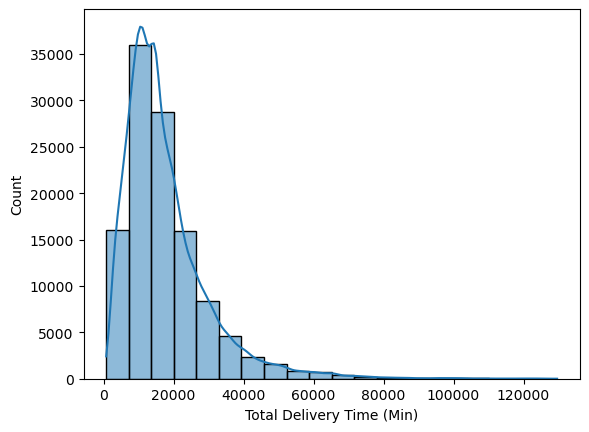

In [78]:
#Plot the values of the Total Delivery Time (Min) column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Total Delivery Time (Min)'], bins=20, kde = True)

In [163]:
#Check how many extreme values there are
df1[df1['Total Delivery Time (Min)'] > 100000]

,Unnamed: 0,Seller Zip,Seller Lat,Seller Lng,Customer Zip,Customer Lat,Customer Lng,Customer ID,Customer Unique ID,Customer City,...,Freight Value,Payment Type,Review ID,Review Score,Order Status,Total Delivery Time (Min),Est.Total Delivery Time (Min),Purchase-to-Approval Time (Min),Order-to-Carrier Time (Min),Fulfillment Time
1344,1344,1212,-23.537511,-46.637057,20551,-22.915371,-43.242996,d27cc8323ccff05b970998013b39e597,ce8b665ad7a00dfee2a4fbd19dedb82a,rio de janeiro,...,14.10,credit_card,ecd7b4b3060e422b5e07f2c012eb39ce,1,delivered,121896.450000,26118.083333,8.483333,2697.266667,Slow
1477,1477,1212,-23.537511,-46.637057,28740,-22.082361,-41.865673,938dbea1d465c3eee57f3dc8923dcb16,651da97b2f7575d76efe82f970e57116,conceicao de macabu,...,15.10,credit_card,ce1ee648483120fb4eb6e4690ad71b25,1,delivered,106683.516667,32400.166667,15.733333,3496.916667,Slow
3496,3496,2016,-23.500978,-46.627123,-12326,-7.998471,-34.896545,128dfb72bd29cd4dcc32059adb91c97e,0a3914c4e984aaedffc767c38030bed2,olinda,...,21.38,credit_card,1fd215a6ec72ea33cc318a0ad87b58c0,1,delivered,121205.383333,46639.983333,1431.466667,9059.600000,Slow
4692,4692,2310,-23.471944,-46.598645,4364,-9.974562,-67.809656,2d618e470c95c9b425cbb0cbc42683dd,f7d7fc0a59ef4363fdce6e3aa069d498,rio branco,...,27.58,credit_card,d4ed8fa83c53b696165bf10e145b1e4b,1,delivered,103965.566667,57938.783333,9.350000,3050.633333,Slow
5923,5923,2955,-23.468441,-46.720688,-4703,-3.795992,-38.474776,c9573cc1e246dadca50b2a74f795def3,7671178c592895e5beed747367b4a54b,fortaleza,...,17.63,credit_card,10fff4faa197b0a1b7d7b087a7cb1836,1,delivered,108984.100000,40271.500000,33.366667,1313.133333,Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111773,111773,88730,-28.327531,-49.180510,22621,-23.013733,-43.311539,1f19186e80a1db14a79e2acf2f21fab2,4db98cd6c721024cf56fcc4662069d72,rio de janeiro,...,25.01,credit_card,3295c59b29255af591790b625af52934,1,delivered,101243.400000,36879.516667,9.850000,158.416667,Slow
112009,112009,88801,-28.673779,-49.373146,-4793,-3.807448,-38.539348,58aad244991735b54dffc6781d3a508d,669d498c3802c9949bf5969d1d0fdfc6,fortaleza,...,55.42,credit_card,c1863924195066c0efabe1d582e2834c,3,delivered,102470.100000,50661.533333,8.383333,31654.266667,Slow
113754,113754,89204,-26.283149,-48.851285,-21216,-12.504727,-39.000225,6cbc69ef01df8d34bd134c6d828c1e53,026d6aade0923331c6065e5daa7aafda,conceicao da feira,...,29.77,credit_card,3a0a9d9d4ed9e6323a527572187a987d,4,delivered,120428.150000,40645.416667,10.550000,851.566667,Slow
114301,114301,89560,-27.000869,-51.145320,-1628,-4.967513,-39.011546,56033dc0fa885647a8cc84db067729ea,58c2385a00210b1ce3ad1542d4ab16fe,quixada,...,100.84,voucher,650f27998c7eb14a72302066cf6f8185,1,delivered,100809.516667,63625.583333,4017.316667,54777.716667,Slow


In [164]:
#Clean the extreme values
df1 = df1[df1['Total Delivery Time (Min)'] < 100000]

In [165]:
#Check the mean
df1['Total Delivery Time (Min)'].mean()

17587.69429884639

In [166]:
#Check the median
df1['Total Delivery Time (Min)'].median()

14663.983333333334

In [167]:
#Check the maximum
df1['Total Delivery Time (Min)'].max()

99602.76666666666

##### Est.Total Delivery Time (Min)

<AxesSubplot:xlabel='Est.Total Delivery Time (Min)', ylabel='Count'>

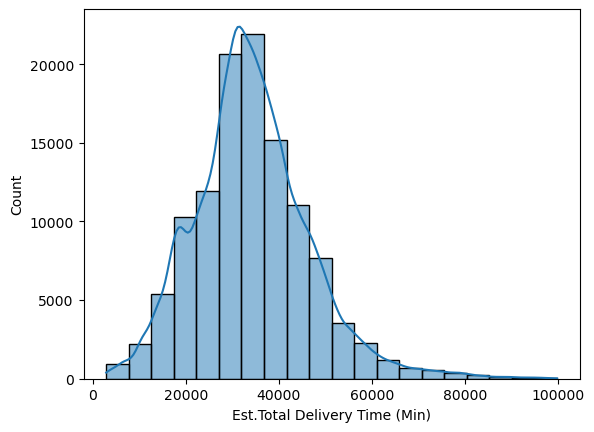

In [83]:
#Plot the values of the Est.Total Delivery Time (Min) column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Est.Total Delivery Time (Min)'], bins=20, kde = True)

In [84]:
#Check the mean
df1['Est.Total Delivery Time (Min)'].mean()

34262.661007331706

In [85]:
#Check the median
df1['Est.Total Delivery Time (Min)'].median()

33473.09166666667

In [86]:
#Check the median
df1['Est.Total Delivery Time (Min)'].max()

99853.01666666666

In [ ]:
#Check the mean
df1[''].mean()

In [ ]:
#Check the median
df1[''].median()

In [ ]:
#Check the median
df1[''].max()

In [55]:
#Clean the extreme values
df1 = df1[df1['Est.Total Delivery Time (Min)'] < 100000]

##### Purchase-to-Approval Time (Min)

<AxesSubplot:xlabel='Purchase-to-Approval Time (Min)', ylabel='Count'>

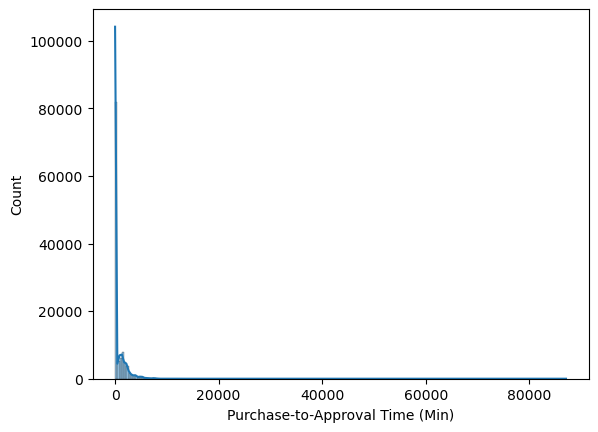

In [57]:
#Plot the values of the column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Purchase-to-Approval Time (Min)'], bins=200, kde = True)

In [58]:
#Check how many extreme values there are
df1[df1['Purchase-to-Approval Time (Min)'] > 10000]

,Unnamed: 0,Seller Zip,Seller Lat,Seller Lng,Customer Zip,Customer Lat,Customer Lng,Customer ID,Customer Unique ID,Customer City,...,Freight Value,Payment Type,Review ID,Review Score,Order Status,Total Delivery Time (Min),Est.Total Delivery Time (Min),Purchase-to-Approval Time (Min),Order-to-Carrier Time (Min),Fulfillment Time
102,102,1026,-23.539495,-46.632844,5893,-23.658173,-46.790237,c15eed3881abc9e06763c989679c5094,48d6d950c0aba132537fc335c0c56e01,sao paulo,...,7.78,voucher,8e762254a11ad4292ec8fb6586c681cf,2,delivered,19861.150000,25808.616667,12401.850000,12901.750000,Average
4063,4063,2242,-23.488133,-46.607660,6045,-23.569732,-46.794310,dc3ff1c55f63746fe72910164fd2483d,e909a34511c81a374a61b0f06a8bcded,osasco,...,7.39,credit_card,0cd1536fa9d2d519a535929aa3aa4b8d,5,delivered,16662.300000,25343.200000,10538.583333,14734.950000,Average
4362,4362,2252,-23.479317,-46.590434,22773,-26.895500,-48.687952,05e8c670b506e48de998151c93bf87a7,b80d1a6675e4a81a5a45eca76d8f1c9d,itajai,...,15.10,debit_card,69b6b2993b608b44f4226c90ad5a4708,4,delivered,31275.300000,49469.183333,19171.966667,25771.900000,Slow
5304,5304,2634,-23.460165,-46.650664,-25293,-12.990463,-38.498762,c7c94293f2433a2421bc2dbd8cd23ee6,07c827034e7b896749af6c9cc366c00f,salvador,...,15.79,credit_card,deb25160337f7caee785728386729f73,1,delivered,41683.816667,34870.100000,17466.233333,4440.100000,Slow
6319,6319,3006,-23.543136,-46.623716,22230,-22.937816,-43.176199,fcb4cecebc159e210cd769d5b767d113,aef59fd9f7310b6ea1600876c510024f,rio de janeiro,...,15.32,debit_card,6dbe30770adf8a80fee0512a152c8c71,4,delivered,11598.716667,18987.300000,15627.200000,6970.300000,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112373,112373,89041,-26.911411,-49.111436,30431,-19.946083,-43.966746,ea2ba2a668051e4b78923fc0ef607f86,ac1cc7f78641b68413edd9742dd16abe,belo horizonte,...,17.78,debit_card,6e4e68b4ec6ef1cf5a02fad77c0fb559,1,canceled,14663.983333,54799.100000,40564.200000,3216.366667,NaN
113984,113984,89460,-26.168622,-50.392862,15900,-21.409881,-48.496894,b24e1d90e8595b3864e7e462ed85e0ab,cf829b34d1bd3ec535a5e4e04f2c4692,taquaritinga,...,17.67,boleto,87b70b615b6d5bc1bc7a6e5ccc6dc6e9,4,delivered,31383.666667,43757.000000,14191.816667,17135.816667,Slow
114223,114223,89560,-27.000869,-51.145320,27351,-22.528073,-44.203041,2bfd566c10ff41c47dc6e2f9dd51b467,31d01917860b026341cdde17c942b59b,barra mansa,...,8.40,boleto,42090eea831a1873d7fb9d583a56978f,1,delivered,33525.583333,42602.100000,11837.733333,13708.683333,Slow
114224,114224,89560,-27.000869,-51.145320,27351,-22.528073,-44.203041,2bfd566c10ff41c47dc6e2f9dd51b467,31d01917860b026341cdde17c942b59b,barra mansa,...,8.40,boleto,42090eea831a1873d7fb9d583a56978f,1,delivered,33525.583333,42602.100000,11837.733333,13708.683333,Slow


In [87]:
#Check the mean
df1['Purchase-to-Approval Time (Min)'].mean()

616.1898723376125

In [88]:
#Check the median
df1['Purchase-to-Approval Time (Min)'].median()

20.8

In [89]:
#Check the median
df1['Purchase-to-Approval Time (Min)'].max()

9873.633333333331

##### Order-to-Carrier Time (Min)

<AxesSubplot:xlabel='Order-to-Carrier Time (Min)', ylabel='Count'>

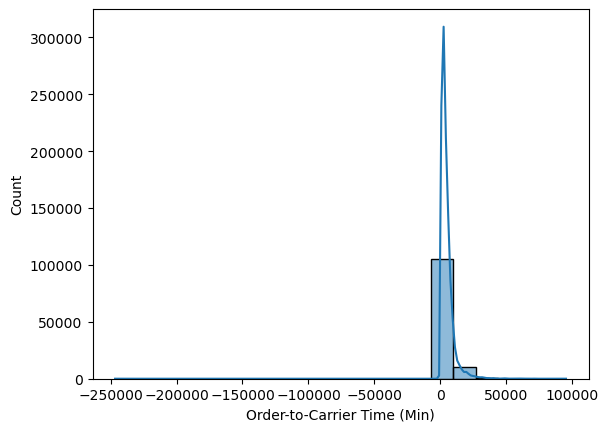

In [60]:
#Plot the values of the column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Order-to-Carrier Time (Min)'], bins=20, kde = True)

In [90]:
#Check the mean
df1['Order-to-Carrier Time (Min)'].mean()

4672.1327852254135

In [91]:
#Check the median
df1['Order-to-Carrier Time (Min)'].median()

3216.366666666667

In [92]:
#Check the median
df1['Order-to-Carrier Time (Min)'].max()

59701.6

In [62]:
#Clean the extreme values
df1 = df1[df1['Order-to-Carrier Time (Min)'] > 0]

<AxesSubplot:xlabel='Order-to-Carrier Time (Min)', ylabel='Count'>

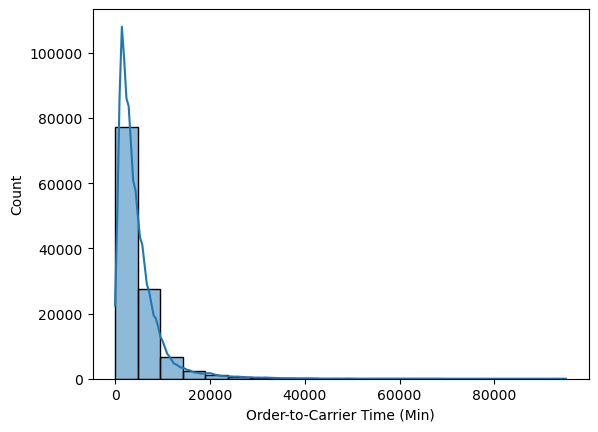

In [63]:
sns.histplot(df1['Order-to-Carrier Time (Min)'], bins=20, kde = True)

##### Price

<AxesSubplot:xlabel='Price', ylabel='Count'>

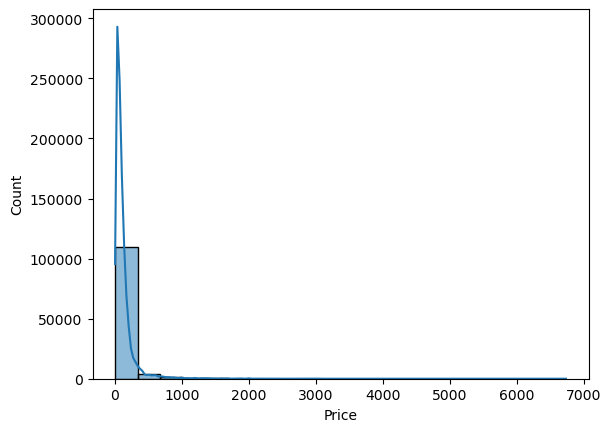

In [69]:
#Plot the values of the column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Price'], bins=20, kde = True)

In [93]:
#Check the mean
df1['Price'].mean()

119.59155810644573

In [94]:
#Check the median
df1['Price'].median()

74.9

In [95]:
#Check the median
df1['Price'].max()

2999.99

##### Freight Value

<AxesSubplot:xlabel='Freight Value', ylabel='Count'>

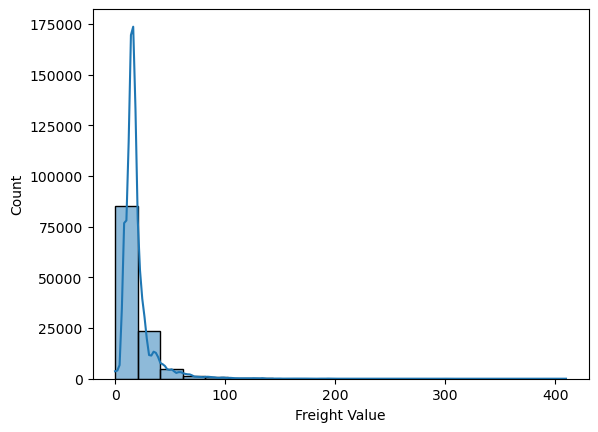

In [74]:
#Plot the values of the column on a histogram to see if there are any extreme values that skew our results
sns.histplot(df1['Freight Value'], bins=20, kde = True)

In [96]:
#Check the mean
df1['Freight Value'].mean()

19.979081639679425

In [97]:
#Check the median
df1['Freight Value'].median()

16.26

In [98]:
#Check the median
df1['Freight Value'].max()

409.68

## 3.) Data Prep for Regression Analysis

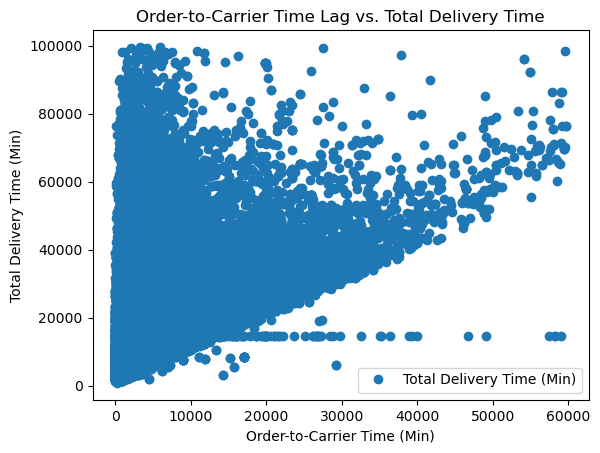

In [172]:
# Create a scatterplot using matplotlib for another look at how the Order-to-Carrier Time and Total Delivery Time variables plot against each other.

df1.plot(x = 'Order-to-Carrier Time (Min)', y='Total Delivery Time (Min)',style='o')
plt.title('Order-to-Carrier Time Lag vs. Total Delivery Time')  
plt.xlabel('Order-to-Carrier Time (Min)')  
plt.ylabel('Total Delivery Time (Min)')  
plt.show()

In [173]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['Order-to-Carrier Time (Min)'].values.reshape(-1,1)
y = df1['Total Delivery Time (Min)'].values.reshape(-1,1)

In [174]:
X

array([[ 723.43333333],
       [2314.03333333],
       [1129.63333333],
       ...,
       [2316.66666667],
       [4703.71666667],
       [1594.65      ]])

In [175]:
y

array([[ 2707.26666667],
       [14353.43333333],
       [ 2979.45      ],
       ...,
       [21248.66666667],
       [13127.71666667],
       [ 7718.06666667]])

In [176]:
#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4.) Regression Analysis

### 1.) Regression Analysis for Total Delivery Time and Order-to-Carrier Time Lag

In [177]:
#Create a regression object to be fit to our training set
regression = LinearRegression()

In [178]:
#Fit the regression object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [179]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

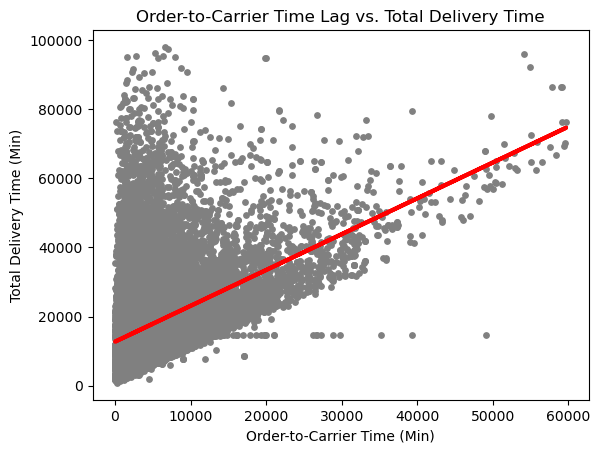

In [180]:
#Create a plot for Delivery Time and Order-to-Carreier Time that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Order-to-Carrier Time Lag vs. Total Delivery Time')
plot_test.xlabel('Order-to-Carrier Time (Min)')
plot_test.ylabel('Total Delivery Time (Min)')
plot_test.show()

In [181]:
# Look at the R2 Score and Root Means Squared Error for the y-variable (dependent) to evaluate the accuracy of the model.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [182]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.03752558]]
Mean squared error:  116553862.16124456
R2 score:  0.17800666074596905


There is somewhat of a relationship between order-to-carrier times and total delivery times that gest progressively stronger in orders above 15,000 minutes between order and delivery to the carrier. Still, the majority of orders have order-to-carrier lag times of less than 15,000 minutes, making these factors difficult to draw strong, predictive conclusions from.

I had to remove extreme values on either end to improve the fit of the model. The low R2 Score and high MSE indicate that this is a poor model for predictive purposes. It's difficult to predict total delivery prices, based on order-to-carrier time lag using this model.

### 2.) Regression Analysis & Training/Test Data for Delivery Time and Review Score

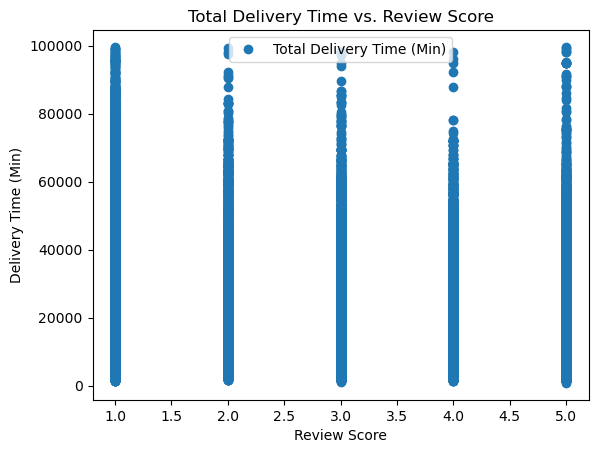

In [184]:
# Create a scatterplot using matplotlib for another look at how the Order-to-Carrier Time and Total Delivery Time variables plot against each other.

df1.plot(x = 'Review Score', y='Total Delivery Time (Min)',style='o')
plt.title('Total Delivery Time vs. Review Score')  
plt.xlabel('Review Score')  
plt.ylabel('Delivery Time (Min)')  
plt.show()

In [135]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['Total Delivery Time (Min)'].values.reshape(-1,1)
y = df1['Review Score'].values.reshape(-1,1)

In [136]:
#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Analysis- Delivery Time and Review Score

In [137]:
#Create a regression object to be fit to our training set
regression = LinearRegression()

In [138]:
#Fit the regression object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [139]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

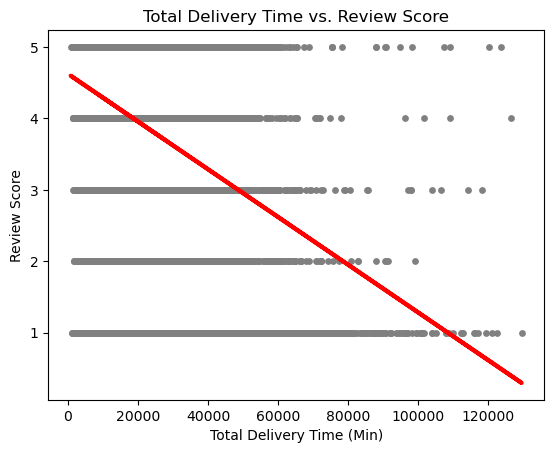

In [140]:
#Create a plot for Delivery Time and Order-to-Carreier Time that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Delivery Time vs. Review Score')
plot_test.xlabel('Total Delivery Time (Min)')
plot_test.ylabel('Review Score')
plot_test.show()

In [141]:
# Look at the R2 Score and Root Means Squared Error for the y-variable (dependent) to evaluate the accuracy of the model.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [142]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.33694711e-05]]
Mean squared error:  1.7528686077676905
R2 score:  0.0896652804586262


To a limited extent, there is an inverse relationship between delivery time and customer review scores. This only holds up to a point and the large number of outliers and values of the same score with vastly different elivery times indicates that other factors play a stronger role in customer satisfaction. This is a stronger model than the one that looked at order-to-carrier times and total delivery times, however, it's still not strong for predictive purposes, as indicated by its very low R2 Score (although it does have a relatively small MSE, which is a good sign.) 

### 3.) Regression Analysis & Training/Test Data for Price and Delivery Time

#### Regression Analysis & Training/Test Data for Price and Delivery Time

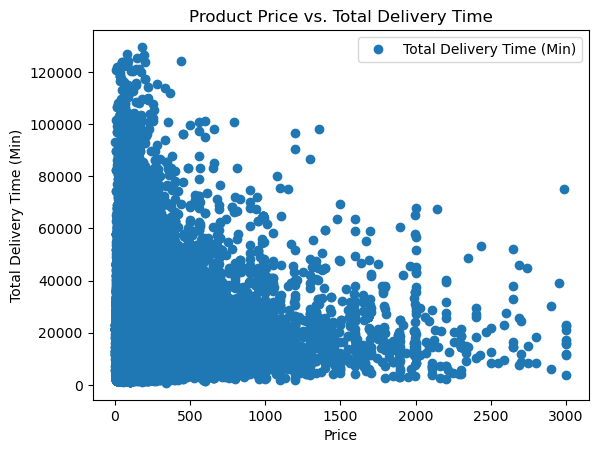

In [146]:
# Create a scatterplot using matplotlib for another look at how the Order-to-Carrier Time and Total Delivery Time variables plot against each other.

df1.plot(x = 'Price', y='Total Delivery Time (Min)',style='o')
plt.title('Product Price vs. Total Delivery Time')  
plt.xlabel('Price')  
plt.ylabel('Total Delivery Time (Min)')  
plt.show()

In [186]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['Price'].values.reshape(-1,1)
y = df1['Total Delivery Time (Min)'].values.reshape(-1,1)

In [187]:
#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [188]:
#Create a regression object to be fit to our training set
regression = LinearRegression()

In [189]:
#Fit the regression object to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [190]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

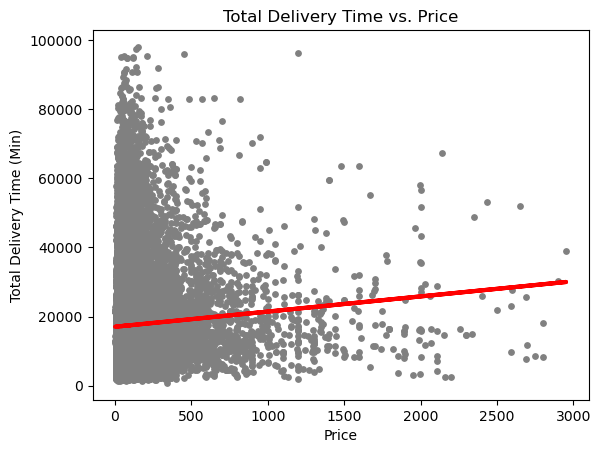

In [191]:
#Create a plot for Delivery Time and Order-to-Carreier Time that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Delivery Time vs. Price')
plot_test.xlabel('Price')
plot_test.ylabel('Total Delivery Time (Min)')
plot_test.show()

In [192]:
# Look at the R2 Score and Root Means Squared Error for the y-variable (dependent) to evaluate the accuracy of the model.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [193]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.39429963]]
Mean squared error:  141090874.8579498
R2 score:  0.0049599626109861905


Again, the model here is not useful for predictive purposes as indivated by the low R2 score and very large MSE value. There is certainly a connection between price and delivery time once you get above a pricepoint of 1000 but, overall, there is not a strong relationship.